Nama: : Jessica Theresia<br>
Email: : me.jessicatheresia@gmail.com<br>
ID Dicoding: : jessica_trs<br>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - Dataset "bank_transactions_data_2.csv"
   - Jumlah Data: 2,512 baris (memenuhi syarat minimal 2,500 baris)
   - Jumlah Fitur: 16 kolom (terdiri dari numerikal & kategorikal)
   - Jenis Data:
    * Numerik: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance
    * Kategorikal: TransactionType, Location, CustomerOccupation, Channel, dll.

Repository : https://github.com/Jejetrs/Dicoding-DBS-Camp---ML-Pemula-Module..git

# **2. Import Library**

Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import boxcox

# **3. Memuat Dataset**

Pada tahap ini untuk memuat dataset yang memiliki format CSV serta memastikan direktorinya benar, menghubungkan Google Drive ke Colab terlebih dahulu.

In [2]:
# Memuat dataset dari Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Memuat dataset dengan path yang benar
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_clustering.csv")

# Menampilkan beberapa baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
# Missing value
missing_values = df.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values dalam dataset: {total_missing}")

Jumlah missing value per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Total missing values dalam dataset: 0


In [6]:
# Deteksi Outlier dengan Z-Score
df_outlier = df.copy()
z_scores = np.abs(zscore(df_outlier.select_dtypes(include=['number'])))
outliers_z = (z_scores > 3).sum(axis=0)

print("\nJumlah Outlier per Kolom (Z-Score > 3):")
print(outliers_z)


Jumlah Outlier per Kolom (Z-Score > 3):
TransactionAmount      48
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
AccountBalance          0
dtype: int64


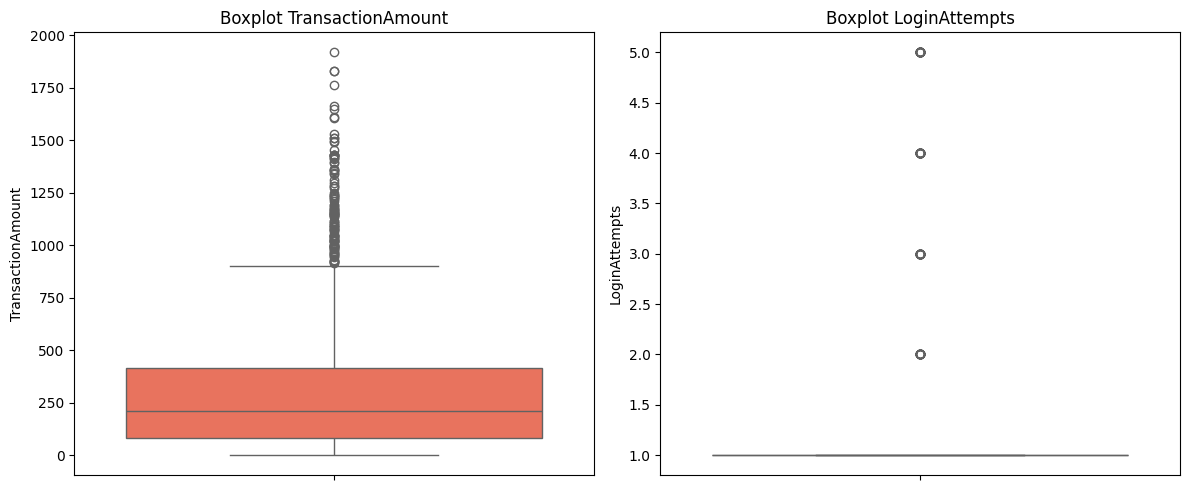

In [7]:
# Visualisasi outlier
outlier_features = ["TransactionAmount", "LoginAttempts"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(outlier_features):
    sns.boxplot(y=df[col], ax=axes[i], color='tomato')
    axes[i].set_title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [8]:
# data duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


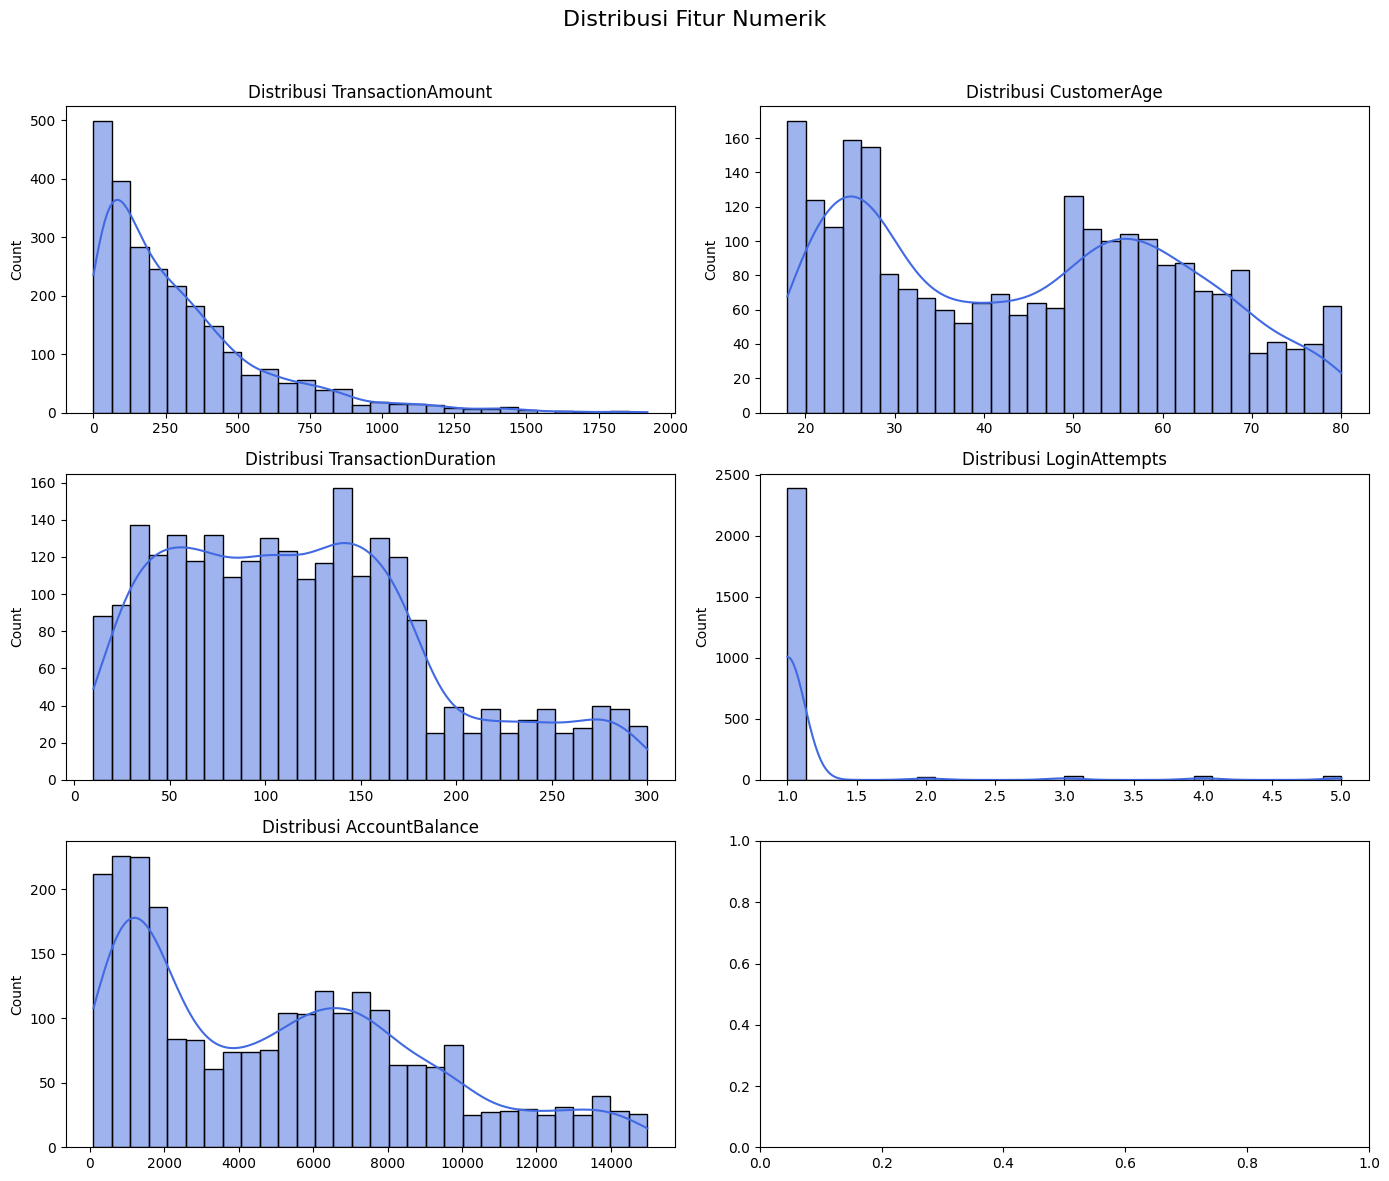

In [9]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribusi Fitur Numerik", fontsize=16)

numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
print(df['TransactionAmount'].skew())

1.7401067216605806


In [11]:
# Identifikasi fitur kategorikal
categorical_features = ["TransactionType", "Location", "DeviceID", "IP Address", "MerchantID", "Channel", "CustomerOccupation"]

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in categorical_features}
unique_values

{'TransactionType': 2,
 'Location': 43,
 'DeviceID': 681,
 'IP Address': 592,
 'MerchantID': 100,
 'Channel': 3,
 'CustomerOccupation': 4}

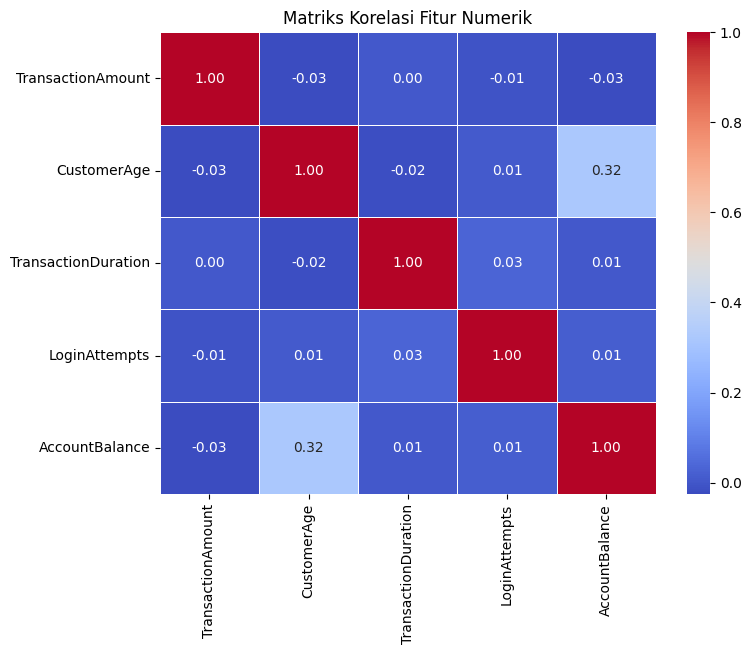

In [12]:
# Hitung korelasi antara fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang saya lakukan :
1. Transformasi Quantile untuk TransactionAmount
  * Menggunakan Quantile Transformer untuk mengubah distribusi menjadi normal.
  * Visualisasi histogram sebelum & sesudah transformasi untuk melihat perbedaan distribusi.

2. Penghapusan Kolom yang Tidak Relevan
  * Menghapus kolom seperti TransactionID, AccountID, TransactionDate, dll., karena tidak relevan untuk analisis.

3. Encoding Variabel Kategorikal
  * Menggunakan Label Encoding untuk mengubah variabel kategorikal (TransactionType, Location, dll.) menjadi bentuk numerik.

4. Normalisasi Data Numerik
  * StandardScaler digunakan untuk menstandarisasi fitur numerik (TransactionAmount, CustomerAge, dll.).
  * Log Transform (log1p) diterapkan ke LoginAttempts untuk mengatasi skewness.

5. Visualisasi Korelasi Fitur
  * Heatmap korelasi dibuat untuk melihat hubungan antar fitur numerik setelah preprocessing.

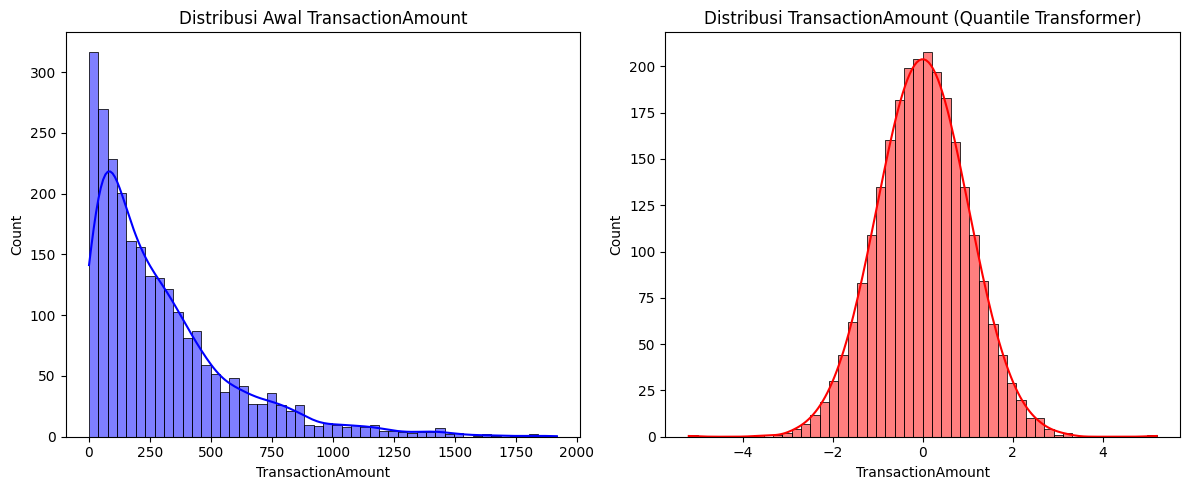

In [13]:
# Transformasi Quantile untuk TransactionAmount
df_transformed = df.copy()

quantile_transformer = QuantileTransformer(output_distribution="normal", random_state=42)
df["TransactionAmount"] = quantile_transformer.fit_transform(df[["TransactionAmount"]])

# Plot distribusi sebelum & sesudah transformasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Menggunakan df_transformed sebelum transformasi untuk visualisasi awal
sns.histplot(df_transformed["TransactionAmount"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribusi Awal TransactionAmount")

sns.histplot(df["TransactionAmount"], bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Distribusi TransactionAmount (Quantile Transformer)")

plt.tight_layout()
plt.show()

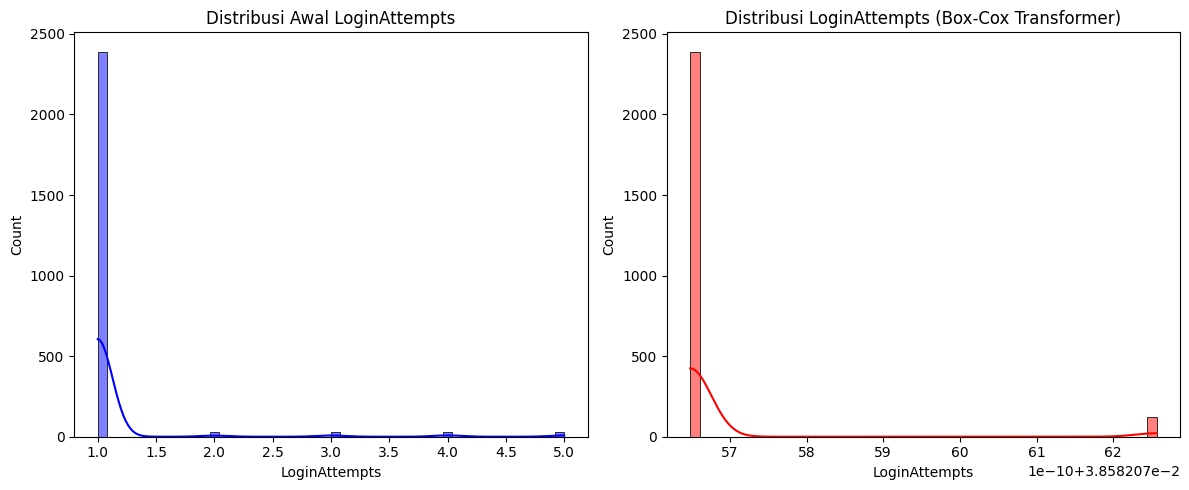

In [14]:
#Visualisasi data LoginAttempts
df_transformed = df.copy()

df["LoginAttempts"], _ = boxcox(df["LoginAttempts"] + 1)  # +1 untuk menghindari nol

# Plot distribusi sebelum dan sesudah transformasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_transformed["LoginAttempts"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribusi Awal LoginAttempts")

sns.histplot(df["LoginAttempts"], bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Distribusi LoginAttempts (Box-Cox Transformer)")

plt.tight_layout()
plt.show()

In [15]:
# Cek skewness LoginAttemps sebelum dan sesudah transformasi
skew_before = df_transformed["LoginAttempts"].skew()
skew_after = df["LoginAttempts"].skew()

print(f"Skewness sebelum transformasi: {skew_before:.4f}")
print(f"Skewness setelah transformasi: {skew_after:.4f}")

Skewness sebelum transformasi: 5.1735
Skewness setelah transformasi: 0.0000


In [16]:
# Menghapus kolom yang tidak relevan
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Tipe data sebelum encoding:\n", df.dtypes)

Tipe data sebelum encoding:
 TransactionAmount      float64
TransactionType         object
Location                object
DeviceID                object
MerchantID              object
Channel                 object
CustomerAge              int64
CustomerOccupation      object
TransactionDuration      int64
LoginAttempts          float64
AccountBalance         float64
dtype: object


In [17]:
# Encoding Variabel Kategorikal
label_encoders = {}
categorical_features = ["TransactionType", "Location", "DeviceID", "MerchantID", "Channel", "CustomerOccupation"]
for col in categorical_features:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

print("Kolom setelah encoding:\n", df.columns)

Kolom setelah encoding:
 Index(['TransactionAmount', 'TransactionType', 'Location', 'DeviceID',
       'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [18]:
# Normalisasi data
scalers = {}

numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Dataset setelah preprocessing
print("Dataset setelah preprocessing:")

df.head()

Dataset setelah preprocessing:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.680027,1,36,365,14,0,1.423718,0,-0.552443,0.038582,-0.000537
1,0.571820,1,15,50,51,0,1.311287,0,0.305314,0.038582,2.216472
2,-0.375787,1,23,229,8,2,-1.443277,3,-0.909842,0.038582,-1.023534
3,-0.106191,1,33,182,1,2,-1.049768,3,-1.353017,0.038582,0.885797
4,-1.709220,0,1,298,90,2,-1.049768,3,1.120184,0.038582,0.593589


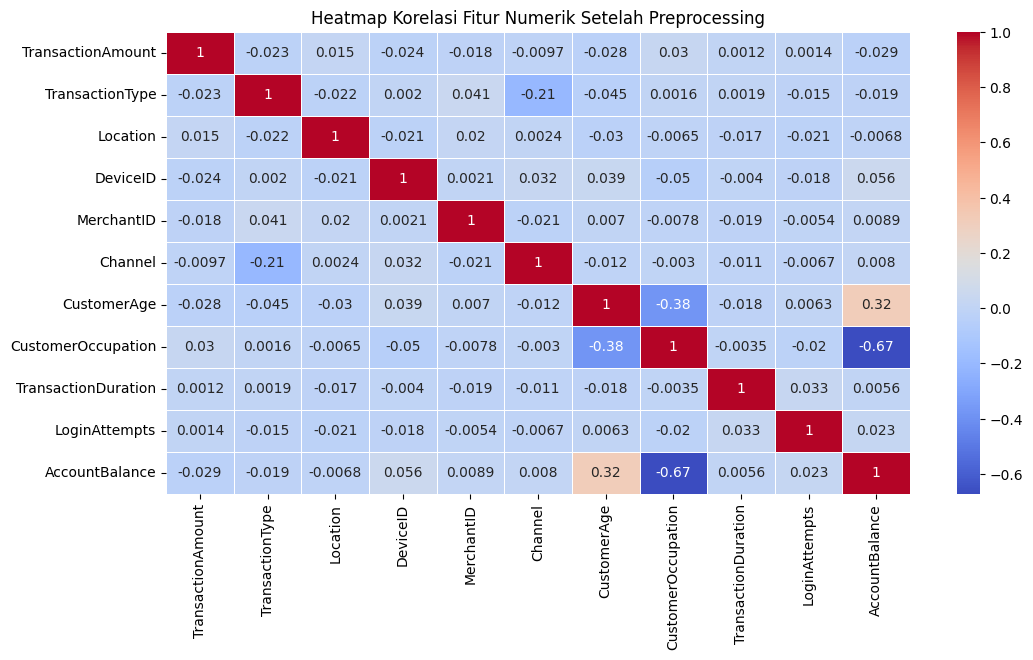

In [19]:
# Membuat heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik Setelah Preprocessing")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan kemudian melatih model dengan data menggunakan algoritma tersebut.

In [20]:
# Model dengan algoritma KMeans
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=20)
labels_temp = kmeans_temp.fit_predict(df)

## **b. Evaluasi Model Clustering**

Evaluasi KMeans Clustering dengan Elbow Method & Silhouette Score
Kode ini bertujuan untuk menentukan jumlah cluster optimal dengan dua metode evaluasi:

1. Elbow Method
* Tujuan: Menganalisis inertia (jumlah total jarak titik ke centroid) untuk menentukan jumlah cluster optimal.

2. Silhouette Score
* Tujuan: Mengevaluasi seberapa baik setiap titik data berada dalam cluster yang benar.

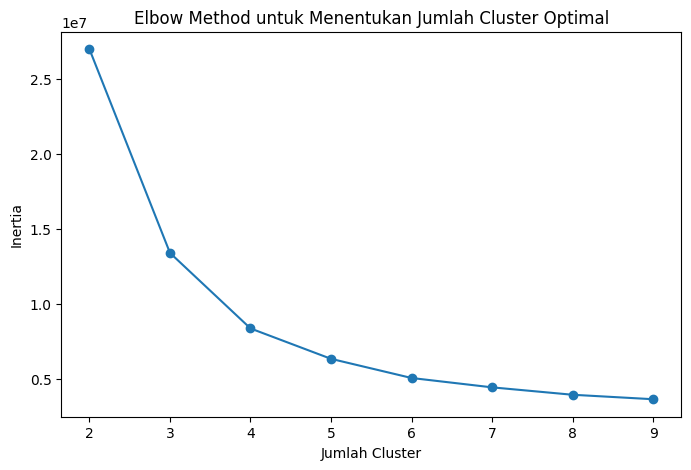

Optimal jumlah cluster (k) berdasarkan Elbow Method: 6


In [21]:
# Evaluasi Elbow
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

optimal_k_elbow = k_values[np.argmin(np.diff(inertia, 2))]  # Menentukan elbow point
print(f"Optimal jumlah cluster (k) berdasarkan Elbow Method: {optimal_k_elbow}")

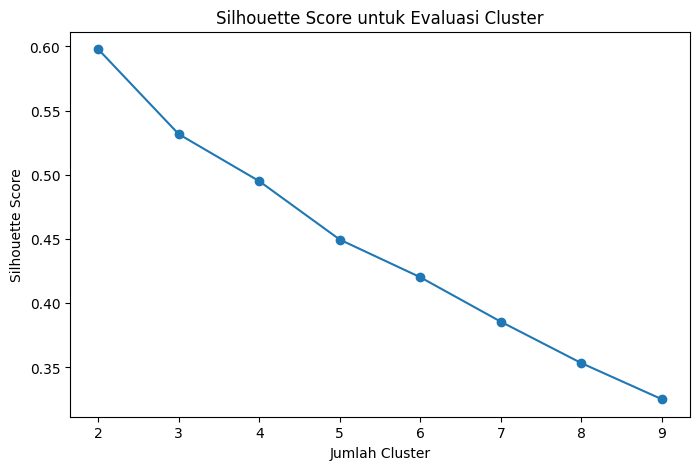

Optimal jumlah cluster (k) berdasarkan Silhouette Score: 2
Silhouette Score tertinggi: 0.5978319912488459


In [22]:
# Evaluasi Silhouette Score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.show()

# Mengecek Silhouette Score untuk berbagai metode clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal jumlah cluster (k) berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score tertinggi: {optimal_silhouette_score}")

## **c. Feature Selection (Opsional)**

Feature selection yang digunakan dalam kode ini adalah SelectKBest dengan mutual_info_classif sebagai metode pemilihan fitur terbaik. Berikut penjelasan singkatnya:

1. SelectKBest (Feature Selection)

  * Tujuan: Memilih 8 fitur terbaik dari dataset berdasarkan hubungan dengan label (target).
  * Metode: Menggunakan mutual information classification, yaitu mengukur hubungan antara setiap fitur dengan target secara non-linear.
  * Hasil: Dataset baru dengan hanya 8 fitur terpilih, yang digunakan untuk analisis lebih lanjut.

2. PCA (Dimensionality Reduction)
  * Tujuan: Mengurangi dimensi fitur terpilih menjadi 3 komponen utama, menjaga informasi utama dari data.
  * Manfaat: Mengurangi kompleksitas data dan meningkatkan efisiensi pemrosesan.

3. KMeans Clustering dengan PCA
  * Menguji jumlah cluster (k) dari 2 hingga 9, dengan mengevaluasi menggunakan Silhouette Score.
  * Memilih jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi.
  * Menjalankan KMeans dengan jumlah cluster terbaik dan menambahkan label cluster ke dataset.

In [23]:
# SelectKBest dengan 8 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_selected = selector.fit_transform(df, labels_temp)
selected_features = df.columns[selector.get_support()]
df_selected = df[selected_features]

print(f"Fitur yang dipilih setelah SelectKBest: {list(selected_features)}")

Fitur yang dipilih setelah SelectKBest: ['Location', 'DeviceID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


In [24]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)
print(f"Dimensi df_pca : {df_pca.shape}")

# Total varians yang dijelaskan oleh PCA
print(f"Total varians yang dijelaskan oleh PCA: {sum(pca.explained_variance_ratio_):.2f}")

Dimensi df_pca : (2512, 2)
Total varians yang dijelaskan oleh PCA: 1.00


In [25]:
# Clustering dengan KMeans setelah PCA
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Tentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal jumlah cluster (k) setelah PCA: {optimal_k}")

# Latih ulang KMeans dengan jumlah cluster terbaik
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
labels_pca = kmeans_pca.fit_predict(df_pca)

df['Cluster_KMeans'] = labels_pca

# Evaluasi Silhouette Score terbaik
silhouette_kmeans = silhouette_score(df_pca, labels_pca)
print(f"Silhouette Score KMeans terbaik setelah PCA: {silhouette_kmeans}")

Optimal jumlah cluster (k) setelah PCA: 2
Silhouette Score KMeans terbaik setelah PCA: 0.6226671102216185


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

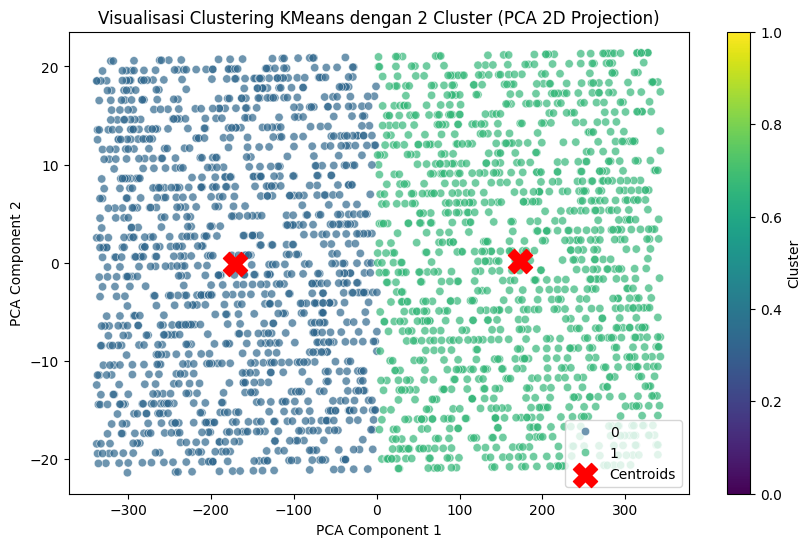

In [26]:
# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette='viridis', alpha=0.7)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Visualisasi Clustering KMeans dengan {optimal_k} Cluster (PCA 2D Projection)")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()

In [27]:
print(f"Dimensi df_pca: {df_pca.shape}")

Dimensi df_pca: (2512, 2)


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target
Melakukan Inverse Transform pada Data Target Setelah Clustering

Setelah melakukan clustering dengan model KMeans, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya.

In [28]:
df_original = df.copy()

for feature in categorical_features:
    if feature in df_original.columns and feature in label_encoders:
        df_original[feature] = label_encoders[feature].inverse_transform(df_original[feature])

print("Data telah dikembalikan ke bentuk aslinya!")

Data telah dikembalikan ke bentuk aslinya!


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [29]:
# Inverse transform untuk fitur numerik yang telah dinormalisasi/standarisasi
df_original[numeric_cols] = scaler.inverse_transform(df[numeric_cols])

In [30]:
# Hasil dataset setelah inverse transform
print(df_original.head())

   TransactionAmount  TransactionType  Location  DeviceID  MerchantID  \
0          -1.693251                1        36       365          14   
1           0.576066                1        15        50          51   
2          -0.378893                1        23       229           8   
3          -0.107205                1        33       182           1   
4          -1.722670                0         1       298          90   

   Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
0        0         70.0                   0                 81.0   
1        0         68.0                   0                141.0   
2        2         19.0                   3                 56.0   
3        2         26.0                   3                 25.0   
4        2         26.0                   3                198.0   

   LoginAttempts  AccountBalance  Cluster_KMeans  
0       0.038582         5112.21               1  
1       0.038582        13758.91               0  

# Analisis karakteristik tiap cluster

In [31]:
# Analisis karakteristik tiap cluster
cluster_summary = df_original.groupby('Cluster_KMeans').agg({
    'TransactionAmount': 'mean',
    'AccountBalance': 'mean',
    'TransactionDuration': 'mean',
    'CustomerAge': 'mean',
}).reset_index()

for index, row in cluster_summary.iterrows():
    print(f"Cluster {int(row['Cluster_KMeans'])}:")
    print(f"Rata-rata Transaction Amount: {row['TransactionAmount']:.2f}")
    print(f"Rata-rata Account Balance: {row['AccountBalance']:.2f}")
    print(f"Rata-rata Transaction Duration: {row['TransactionDuration']:.2f}")
    print(f"Rata-rata Customer Age: {row['CustomerAge']:.2f}")

Cluster 0:
Rata-rata Transaction Amount: 0.02
Rata-rata Account Balance: 4919.30
Rata-rata Transaction Duration: 120.21
Rata-rata Customer Age: 44.39
Cluster 1:
Rata-rata Transaction Amount: -0.03
Rata-rata Account Balance: 5311.49
Rata-rata Transaction Duration: 119.07
Rata-rata Customer Age: 44.96


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1.   Cluster 1
* Rata-rata Transaction Amount: 0.02
* Rata-rata Account Balance: 4919.30
* Rata-rata Transaction Duration: 120.21
* Rata-rata Customer Age: 44.39
* Analisis:
  * Ciri Utama: Pelanggan dalam klaster ini cenderung memiliki transaksi dengan nilai lebih besar meskipun memiliki saldo akun lebih rendah.
  * Pola Transaksi: Meskipun saldo akun lebih rendah, pelanggan di klaster ini tampaknya lebih sering melakukan transaksi yang lebih besar dengan durasi transaksi yang lebih lama.
  * Demografi: Pelanggan di klaster ini memiliki usia rata-rata sekitar 44 tahun, yang menunjukkan bahwa mereka kemungkinan lebih berpengalaman dan mungkin lebih berhati-hati dalam melakukan transaksi.

<br>

2.   Cluster 2
* Rata-rata Transaction Amount: -0.03
* Rata-rata Account Balance: 5311.49
* Rata-rata Transaction Duration: 119.07
* Rata-rata Customer Age: 44.96
* Analisis:
  * Ciri Utama: Pelanggan dalam klaster ini melakukan transaksi dengan nilai lebih kecil tetapi memiliki saldo akun yang lebih tinggi.
  * Pola Transaksi: Meskipun transaksi mereka lebih kecil, pelanggan di klaster ini memiliki kapasitas untuk melakukan transaksi lebih besar berkat saldo akun yang lebih tinggi.
  * Demografi: Pelanggan di klaster ini sedikit lebih tua, dengan usia rata-rata 44.96 tahun, yang menunjukkan bahwa mereka mungkin memiliki pengalaman dan stabilitas finansial yang lebih tinggi.

## Potensi Interpretasi Bisnis

1. Cluster 0 bisa terdiri dari pengguna dengan saldo akun lebih kecil tetapi lebih aktif dalam transaksi.
2. Cluster 1 bisa terdiri dari pelanggan dengan saldo lebih besar, tetapi mungkin lebih berhati-hati atau kurang aktif dalam melakukan transaksi.
3. Jika ini terkait dengan strategi pemasaran, maka Cluster 1 mungkin lebih cocok untuk produk keuangan atau investasi, sementara Cluster 0 lebih cocok untuk promo transaksi dan cashback guna mendorong lebih banyak aktivitas keuangan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
# Tentukan nama file dan path penyimpanan
file_name = "Dataset_inisiasi.csv"  # Ganti dengan nama yang diinginkan
output_path = f"/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/{file_name}"

# Simpan DataFrame ke dalam file CSV di Google Drive
df_original.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan di Google Drive sebagai: {output_path}")

Hasil clustering telah disimpan di Google Drive sebagai: /content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_inisiasi.csv
